# Predicting Diabetes (From pluralsight course)

## Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## PREPARING MODEL:

### Load and review data:

In [2]:
dframe = pd.read_csv("./data/pima-data.csv")

In [3]:

dframe.shape #display (num of rows, num of columns)


(768, 10)

In [4]:
dframe.head() #get first 5 rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


### Check for null values and hidden missing values:

In [5]:
from sklearn.preprocessing import Imputer

print(dframe.isnull().values.any())

print("# rows in dataframe: {0}".format(len(dframe)))
print("# rows with zero -glucose_conc-: {0}".format(len(dframe.loc[dframe['glucose_conc'] == 0])))
print("# rows with zero -diastolic_bp-: {0}".format(len(dframe.loc[dframe['diastolic_bp'] == 0])))
print("# rows with zero -thickness-: {0}".format(len(dframe.loc[dframe['thickness'] == 0])))
print("# rows with zero -insulin-: {0}".format(len(dframe.loc[dframe['insulin'] == 0])))
print("# rows with zero -bmi-: {0}".format(len(dframe.loc[dframe['bmi'] == 0])))
print("# rows with zero -diab_pred-: {0}".format(len(dframe.loc[dframe['diab_pred'] == 0])))
print("# rows with zero -age-: {0}".format(len(dframe.loc[dframe['age'] == 0])))
print("# rows with zero -num_preg-: {0}".format(len(dframe.loc[dframe['num_preg'] == 0])))

dframe_numpreg = dframe.num_preg
dframe_diabetes = dframe.diabetes
del dframe['num_preg']
del dframe['diabetes']

False
# rows in dataframe: 768
# rows with zero -glucose_conc-: 5
# rows with zero -diastolic_bp-: 35
# rows with zero -thickness-: 227
# rows with zero -insulin-: 374
# rows with zero -bmi-: 11
# rows with zero -diab_pred-: 0
# rows with zero -age-: 0
# rows with zero -num_preg-: 111


In [6]:

when_zero_filler = Imputer(missing_values=0, strategy='mean', axis=0) #axis=0 mean column
imputed_dframe = pd.DataFrame(when_zero_filler.fit_transform(dframe))
imputed_dframe.columns = dframe.columns
imputed_dframe.index = dframe.index

imputed_dframe.insert(0, 'num_preg', dframe_numpreg)
imputed_dframe.insert(9, 'diabetes', dframe_diabetes)

### Check for correlated values:

In [7]:
def visualise_correlations(data_frame, size = 10):
    '''
    Display graphical correlations matrix for each pair of columns in data frame.
    Key:
        White - heavy correlation
        Black - without correlation
    '''
    correlations = data_frame.corr('spearman', 9)
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(correlations, cmap=plt.cm.gray)
    plt.xticks(range(len(correlations.columns)), correlations.columns)
    plt.yticks(range(len(correlations.columns)), correlations.columns)

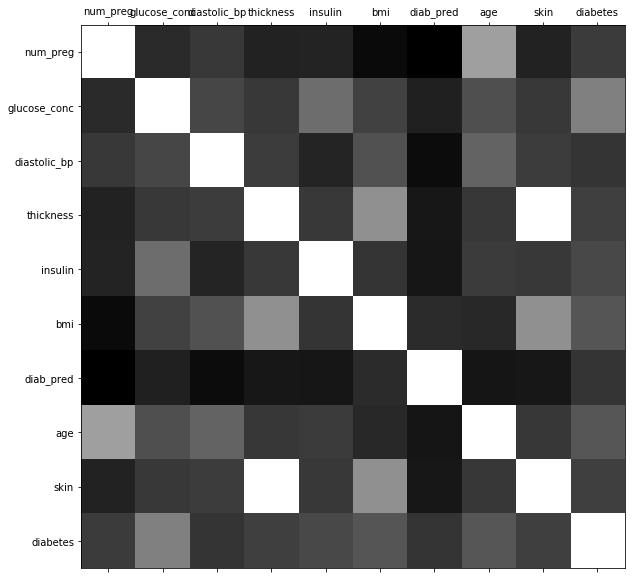

In [8]:
visualise_correlations(imputed_dframe)

In [9]:
imputed_dframe.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.082989,0.221898
glucose_conc,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.192991,0.492928
diastolic_bp,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.192816,0.166074
thickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,1.000000,0.215299
insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.158139,0.214411
bmi,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.542398,0.311924
diab_pred,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.100966,0.173844
age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.127872,0.238356
skin,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,1.000000,0.215299
diabetes,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,0.215299,1.000000


In [10]:
imputed_dframe.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.379000,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,1.142600,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.148645,True
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.906200,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.379000,True


In [11]:
del imputed_dframe['skin']

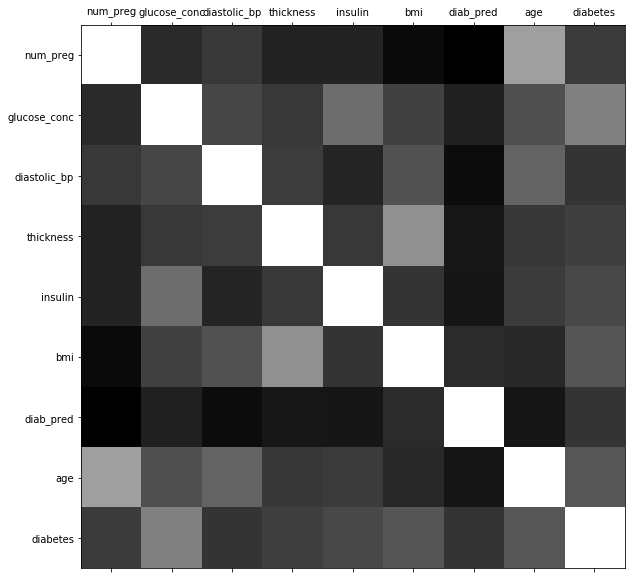

In [12]:
visualise_correlations(imputed_dframe)

### Checks data types:


In [13]:
imputed_dframe.head(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,True
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,True


Change True to 1 and False to 0:


In [14]:
diabetes_map_dictionary = {True : 1, False : 0}


In [15]:
imputed_dframe['diabetes'] = imputed_dframe['diabetes'].map(diabetes_map_dictionary)


In [16]:
imputed_dframe.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


### Checks diabetes(True/False) ratio:

In [17]:
num_true = len(imputed_dframe.loc[imputed_dframe['diabetes'] == 1])
num_false = len(imputed_dframe.loc[imputed_dframe['diabetes'] == 0])

In [18]:
print(num_true/num_false)
print("Number of true cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("Number of false cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false))*100))

0.536
Number of true cases:  268 (34.90%)
Number of false cases: 500 (65.10%)


## TRAINING MODEL:

### Splitting the data:
70% for training and 30% for testing

In [19]:
from sklearn.cross_validation import train_test_split

D:\Narzedzia\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
feature_column_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_column_name = ['diabetes']

In [21]:
df_nunpreg_to_add = imputed_dframe['num_preg'].values

df_features = imputed_dframe[feature_column_names].values
df_predicted = imputed_dframe[predicted_column_name].values

split_test_size = 0.30

df_features_train, df_features_test, df_predicted_train, df_predicted_test = train_test_split(df_features,
                                                                                              df_predicted, 
                                                                                              test_size = split_test_size, 
                                                                                              random_state = 42)

#### Veryfing that prediction value was split correctly:

In [22]:
print("Orginal True: {0}".format(len(imputed_dframe.loc[imputed_dframe['diabetes'] == 1])))
print("Orginal False: {0}".format(len(imputed_dframe.loc[imputed_dframe['diabetes'] == 0])))

print("Training True: {0}".format(len(df_predicted_train[df_predicted_train[:] == 1])))
print("Training False: {0}".format(len(df_predicted_train[df_predicted_train[:] == 0])))

print("Test True: {0}".format(len(df_predicted_test[df_predicted_test[:] == 1])))
print("Test False: {0}".format(len(df_predicted_test[df_predicted_test[:] == 0])))

Orginal True: 268
Orginal False: 500
Training True: 188
Training False: 349
Test True: 80
Test False: 151


In [23]:
imputed_dframe.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


### Training Initial Algorithm - Naive Bayes:

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()

In [26]:
nb_model.fit(df_features_train, df_predicted_train.ravel())

GaussianNB(priors=None)

## TESTING ACCURACY OF THE MODEL:


### Performance on training data:

In [27]:
predict_from_train = nb_model.predict(df_features_train)

In [28]:
from sklearn import metrics

In [29]:
print("Accuracy from train data: {0:.4f}".format(metrics.accuracy_score(df_predicted_train, predict_from_train)))

Accuracy from train data: 0.7523


### Performance on testing data:

In [30]:
predict_from_test = nb_model.predict(df_features_test)

In [31]:
print("Accuracy from train data: {0:.4f}".format(metrics.accuracy_score(df_predicted_test, predict_from_test)))

Accuracy from train data: 0.7403


#### Metrics:

In [32]:
print("Confusion matrix:")
print("{0}".format(metrics.confusion_matrix(df_predicted_test, predict_from_test, labels=[1, 0])))

# objaśnienie macierzy:
#|TruePositive FalsePositive |
#|FalsNegative TrueNegative  |
#Idealnie w tym przypadku byłoby:
#|80 0 |
#|0 151|

Confusion matrix:
[[ 52  28]
 [ 32 119]]


In [33]:
print("Classification report:")
print("{0}".format(metrics.classification_report(df_predicted_test, predict_from_test, labels=[1, 0])))

Classification report:
             precision    recall  f1-score   support

          1       0.62      0.65      0.63        80
          0       0.81      0.79      0.80       151

avg / total       0.74      0.74      0.74       231



## Changed Algorithm - Random Forest:

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(df_features_train, df_predicted_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [36]:
rf_predict_from_train = rf_model.predict(df_features_train)

In [37]:
print("Accuracy from train data: {0:.4f}".format(metrics.accuracy_score(df_predicted_train, rf_predict_from_train)))

Accuracy from train data: 0.9870


In [38]:
rf_predict_from_test = rf_model.predict(df_features_test)

In [39]:
print("Accuracy from train data: {0:.4f}".format(metrics.accuracy_score(df_predicted_test, rf_predict_from_test)))

Accuracy from train data: 0.7446


In [40]:
print("Confusion matrix:")
print("{0}".format(metrics.confusion_matrix(df_predicted_test, rf_predict_from_test, labels=[1, 0])))

Confusion matrix:
[[ 44  36]
 [ 23 128]]


In [41]:
print("Classification report:")
print("{0}".format(metrics.classification_report(df_predicted_test, rf_predict_from_test, labels=[1, 0])))

Classification report:
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



## Changed Algorithm - Logistic Regression:

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr_model = LogisticRegression(C=0.7, random_state=42)

In [44]:
lr_model.fit(df_features_train, df_predicted_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
lr_predict_from_train = lr_model.predict(df_features_train)

In [46]:
print("Accuracy from train data: {0:.4f}".format(metrics.accuracy_score(df_predicted_train, lr_predict_from_train)))

Accuracy from train data: 0.7654


In [47]:
lr_predict_from_test = lr_model.predict(df_features_test)

print("Accuracy from test data: {0:.4f}".format(metrics.accuracy_score(df_predicted_test, lr_predict_from_test)))

Accuracy from test data: 0.7576


In [48]:
print("Confusion matrix:")
print("{0}".format(metrics.confusion_matrix(df_predicted_test, lr_predict_from_test, labels=[1, 0])))

print("Classification report:")
print("{0}".format(metrics.classification_report(df_predicted_test, lr_predict_from_test, labels=[1, 0])))

Confusion matrix:
[[ 45  35]
 [ 21 130]]
Classification report:
             precision    recall  f1-score   support

          1       0.68      0.56      0.62        80
          0       0.79      0.86      0.82       151

avg / total       0.75      0.76      0.75       231



##### Setting regularization parameter:

Max value of recall: 0.738 occured at C=0.300


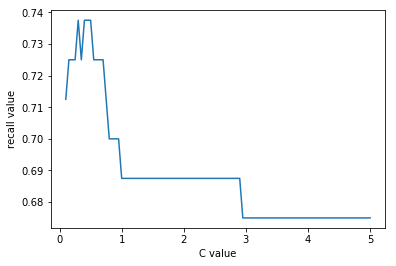

In [49]:
C_start = 0.1
C_end = 5
C_inc = 0.05

C_values, recall_scores = [], []
C_current = C_start
best_recall_score = 0
while C_current < C_end:
    C_values.append(C_current)
    lr_loop_model = LogisticRegression(C=C_current, class_weight='balanced', random_state=42)
    lr_loop_model.fit(df_features_train, df_predicted_train.ravel())
    
    lr_predict_loop_test = lr_loop_model.predict(df_features_test)
    
    recall_score = metrics.recall_score(df_predicted_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_lr_predicted_test = lr_predict_loop_test
    
    C_current += C_inc


best_score_of_C = C_values[recall_scores.index(best_recall_score)]
print("Max value of recall: {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_of_C))

%matplotlib inline

plt.plot(C_values, recall_scores)
plt.xlabel("C value")
plt.ylabel("recall value")

In [50]:
lr_model = LogisticRegression(class_weight='balanced', C=0.3, random_state=42)
lr_model.fit(df_features_train, df_predicted_train.ravel())

lr_predict_from_test = lr_model.predict(df_features_test)
print("Accuracy from test data: {0:.4f}".format(metrics.accuracy_score(df_predicted_test, lr_predict_from_test)))

print("Confusion matrix:")
print("{0}".format(metrics.confusion_matrix(df_predicted_test, lr_predict_from_test, labels=[1, 0])))

print("Classification report:")
print("{0}".format(metrics.classification_report(df_predicted_test, lr_predict_from_test, labels=[1, 0])))

print(metrics.recall_score(df_predicted_test, lr_predict_from_test))

Accuracy from test data: 0.7100
Confusion matrix:
[[ 59  21]
 [ 46 105]]
Classification report:
             precision    recall  f1-score   support

          1       0.56      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


### LogisticRegressionCV (means with Cross Validation):

In [51]:
from sklearn.linear_model import LogisticRegressionCV

In [53]:
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight='balanced')
lr_cv_model.fit(df_features_train, df_predicted_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

#### Predict on test data:

In [54]:
lr_cv_predict_test = lr_cv_model.predict(df_features_test)

print("Accuracy from test data: {0:.4f}".format(metrics.accuracy_score(df_predicted_test, lr_cv_predict_test)))

print("Confusion matrix:")
print("{0}".format(metrics.confusion_matrix(df_predicted_test, lr_cv_predict_test, labels=[1, 0])))

print("Classification report:")
print("{0}".format(metrics.classification_report(df_predicted_test, lr_cv_predict_test, labels=[1, 0])))

print(metrics.recall_score(df_predicted_test, lr_cv_predict_test))

Accuracy from test data: 0.7056
Confusion matrix:
[[ 54  26]
 [ 42 109]]
Classification report:
             precision    recall  f1-score   support

          1       0.56      0.68      0.61        80
          0       0.81      0.72      0.76       151

avg / total       0.72      0.71      0.71       231

0.675
